In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../../../data/processed/reverts_sampled_500k.csv')
df.head()

,Unnamed: 0,user_id,article_id,revision_id,reverted,time,date,time_first_contribution,num_articles_before_revert,num_reverts_before_revert,days_before_revert,time_last_edit_before_revert,time_last_revert_before_revert,days_after_last_edit,days_after_last_revert,num_reverts_after_revert,target
0,0,214317,203875,12291315,1,2005-04-11 05:50:48,2005-04-11,2004-05-02 20:00:41,11515,208,343,2005-04-10,2005-04-09,1,2.0,42107,1
1,1,440590,341858,213566310,1,2008-05-19 22:03:30,2008-05-19,2006-09-25 21:51:51,2484,203,602,2008-05-18,2008-05-18,1,1.0,5024,1
2,2,667740,41971,234786933,1,2008-08-28 14:27:19,2008-08-28,2007-11-06 20:11:04,7401,1414,295,2008-08-27,2008-08-26,1,2.0,31225,1
3,3,6265,4451282,285585921,1,2009-04-23 03:50:53,2009-04-23,2005-11-15 19:07:50,23964,2164,1254,2009-04-22,2009-04-21,1,2.0,2956,1
4,4,229247,6794922,159863563,1,2007-09-23 20:02:08,2007-09-23,2003-06-19 00:42:19,14843,2300,1557,2007-09-21,2007-09-21,2,2.0,4387,1


In [3]:
df.shape

(500000, 17)

In [4]:
df = df.dropna()
df.shape

(495013, 17)

In [5]:
df.target.value_counts()

1    493922
0      1091
Name: target, dtype: int64

In [6]:
class0 = df[df.target==0]
class1 = df[df.target==1].sample(df.target.value_counts()[0])

df1 = shuffle(pd.concat([class0, class1]))
df1.shape

(2182, 17)

In [7]:
y = df1.target
X = df1[['num_articles_before_revert', 'num_reverts_before_revert', 
        'days_before_revert', 'days_after_last_edit', 'days_after_last_revert']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
model = LogisticRegression()

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.05, 0.1, 0.5],
    'class_weight': ['balanced', None]
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/le

In [10]:
y_pred = best_clf.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

0.6824427480916031

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.54      0.64       334
           1       0.64      0.83      0.72       321

   micro avg       0.68      0.68      0.68       655
   macro avg       0.70      0.69      0.68       655
weighted avg       0.70      0.68      0.68       655



Confusion matrix, without normalization
[[182 152]
 [ 56 265]]


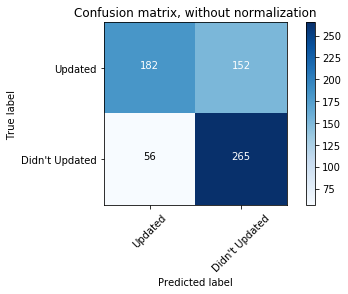

In [13]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Updated', "Didn't Updated"],
                      title='Confusion matrix, without normalization')